In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from descartes import PolygonPatch

In [2]:
# Aperçu du DataFrame Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
# Importation du premier bilan
df_bilan = pd.read_csv("datas/bilan_fao_1.csv", header=0, sep=',', decimal=".")
df_bilan.head()

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster
0,Arménie,1,2017,2944791.0,0.658,1123470.0,35540.05,45.774,5
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1
2,Albanie,3,2017,2884169.0,-0.219,1241000.0,43635.75,55.491,3
3,Algérie,4,2017,41389189.0,4.181,1222385.0,33912.15,27.672,4
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1


In [3]:
# récupération des pays en Anglais
df_pays_english = pd.read_csv("datas/english-countries.csv", header=0, sep=',', decimal=".")
df_pays_english = df_pays_english[["Area Code","Area"]]
area_code = df_pays_english["Area Code"].unique()
area = df_pays_english["Area"].unique()

df_english = pd.DataFrame(columns=["Code zone", "Zone"])
df_english["Code zone"] = area_code
df_english["Zone"] = area
df_english.head()

,Code zone,Zone
0,2,Afghanistan
1,3,Albania
2,4,Algeria
3,5,American Samoa
4,6,Andorra


In [5]:
# Jointure du bilan et des pays Anglais
df_carto = pd.merge(df_bilan, df_english, on="Code zone", how="left")
df_carto.head()

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Zone_y
0,Arménie,1,2017,2944791.0,0.658,1123470.0,35540.05,45.774,5,Armenia
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,Afghanistan
2,Albanie,3,2017,2884169.0,-0.219,1241000.0,43635.75,55.491,3,Albania
3,Algérie,4,2017,41389189.0,4.181,1222385.0,33912.15,27.672,4,Algeria
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,Angola


In [6]:
# Jointure avec le dataset World pour les coordonnées
df_carto_fin = pd.merge(df_carto, world, left_on="Zone_y", right_on="name", how = "left")

In [7]:
df_carto_fin = df_carto_fin[df_carto_fin["geometry"].isnull() == False]
df_carto_fin.head()
# Certains pays sont absents car le nom diffère

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Zone_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Arménie,1,2017,2944791.0,0.658,1123470.0,35540.05,45.774,5,Armenia,3045191.0,Asia,Armenia,ARM,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,Afghanistan,34124811.0,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Albanie,3,2017,2884169.0,-0.219,1241000.0,43635.75,55.491,3,Albania,3047987.0,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,Algérie,4,2017,41389189.0,4.181,1222385.0,33912.15,27.672,4,Algeria,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,Angola,29310273.0,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."


In [8]:
# Mise à jour de la couleur en fonction du Dendogramme 1
df_carto_fin["Color"] = np.where(df_carto_fin["Cluster"]==1, "#55a868",
                                np.where(df_carto_fin["Cluster"]==2, "#c44e52", 
                                        np.where(df_carto_fin["Cluster"]==3, "#64b5cd",
                                                np.where(df_carto_fin["Cluster"]==4, "#8172b3", "#ccb974"))))

In [13]:
# Création d'un dictnnaire Pays / Couleur pour les plots
#liste_zone = df_carto_fin["Zone_y"].to_list()
liste_zone = df_carto_fin[df_carto_fin['Cluster'].isin([1,2])]["Zone_y"].to_list()
#liste_color = df_carto_fin["Color"].to_list()
liste_color = df_carto_fin[df_carto_fin['Cluster'].isin([1,2])]["Color"].to_list()

dict_pays={}
for i in range(len(liste_zone)):
    dict_pays[liste_zone[i]]=liste_color[i]

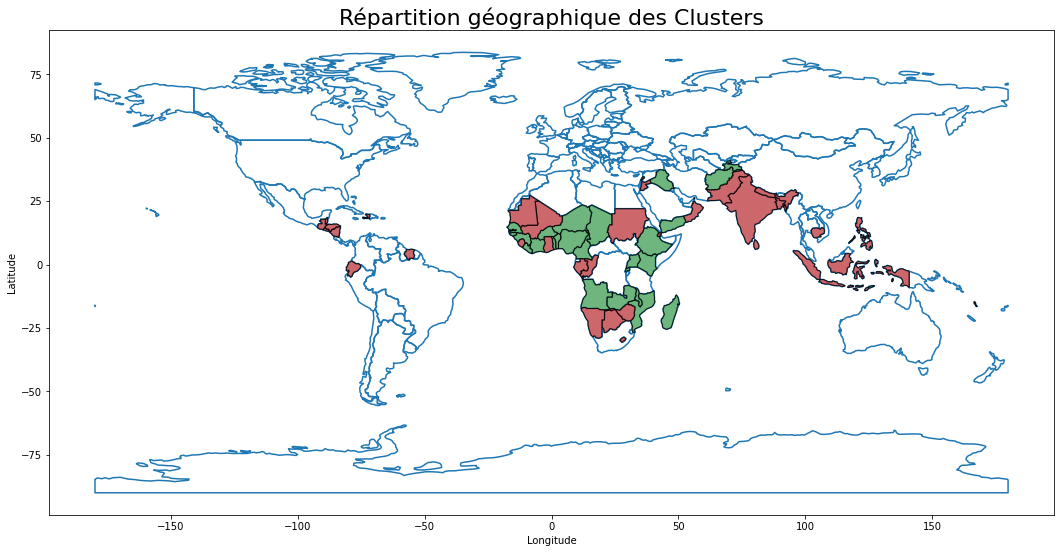

<Figure size 432x288 with 0 Axes>

In [14]:
# Création de la carte complète

def plotCountryPatch( axes, country_name, fcolor):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2))

# plot du monde entier
#ax2 = world.plot( figsize=(12,8), edgecolor=u'gray', cmap='Set3' )
ax2 = world.boundary.plot(figsize=(18,15) )

# Plot des pays avec la bonne couleur
for zone_y, color in dict_pays.items():
    plotCountryPatch(ax2, zone_y, color)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Répartition géographique des Clusters', fontsize=22)

ax2.axis('scaled')
plt.show()
plt.savefig('exports/geo_dendogram_1.png')

In [4]:
# Importation du premier bilan Kmeans
#df_bilankm = pd.read_csv("datas/select_pays_kmeans.csv", header=0, sep=',', decimal=".")

df_bilankm = pd.read_csv("datas/select_pays_kmeans.csv", header=0, sep=',', decimal=".")
df_bilankm.head()

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm
0,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0
1,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0
2,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3
3,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3
4,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3


In [5]:
# Jointure du bilan et des pays Anglais
df_cartokm = pd.merge(df_bilankm, df_english, on="Code zone", how="left")
df_cartokm.head()

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,Zone_y
0,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0,Afghanistan
1,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0,Angola
2,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3,Bangladesh
3,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3,Bolivia (Plurinational State of)
4,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3,Botswana


In [6]:
# Jointure avec le dataset World pour les coordonnées
df_carto_fin_km = pd.merge(df_cartokm, world, left_on="Zone_y", right_on="name", how = "left")

In [7]:
df_carto_fin_km = df_carto_fin_km[df_carto_fin_km["geometry"].isnull() == False]
df_carto_fin_km.head()
# Certains pays sont absents car le nom diffère

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,Zone_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0,Afghanistan,34124811.0,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0,Angola,29310273.0,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3,Bangladesh,157826578.0,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
4,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3,Botswana,2214858.0,Africa,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
5,Belize,23,2017,375769.0,4.110,984770.0,24520.70,37.883,2,3,Belize,360346.0,North America,Belize,BLZ,3088.0,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."


In [8]:
# Mise à jour de la couleur en fonction du Dendogramme 1
df_carto_fin_km["Color"] = np.where(df_carto_fin_km["Clusterkm"]==0, "#55a868",
                                np.where(df_carto_fin_km["Clusterkm"]==1, "#c44e52", 
                                        np.where(df_carto_fin_km["Clusterkm"]==2, "#64b5cd",
                                                np.where(df_carto_fin_km["Clusterkm"]==3, "#8172b3", "#ccb974"))))

In [9]:
# Création d'un dictnnaire Pays / Couleur pour les plots
liste_zone_km = df_carto_fin_km["Zone_y"].to_list()
liste_color_km = df_carto_fin_km["Color"].to_list()

dict_pays_km={}
for ikm in range(len(liste_zone_km)):
    dict_pays_km[liste_zone_km[ikm]]=liste_color_km[ikm]

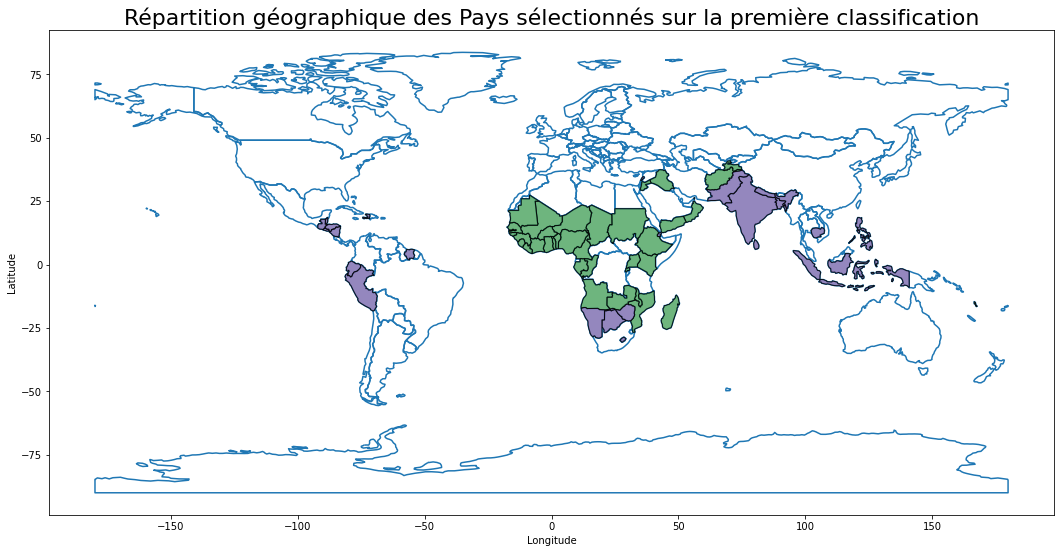

<Figure size 432x288 with 0 Axes>

In [11]:
def plotCountryPatch( axes, country_name, fcolor):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2))

# plot du monde entier
#ax2 = world.plot( figsize=(12,8), edgecolor=u'gray', cmap='Set3' )
ax2 = world.boundary.plot(figsize=(18,15) )

# Plot des pays avec la bonne couleur
for zone_y, color in dict_pays_km.items():
    plotCountryPatch(ax2, zone_y, color)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Répartition géographique des Pays sélectionnés sur la première classification', fontsize=22)

ax2.axis('scaled')
plt.show()
plt.savefig('exports/geo_fin.png')

In [12]:
df_bilankm = pd.read_csv("datas/deniere_selection.csv", header=0, sep=',', decimal=".")
df_bilankm.head()

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2,Clusterkm5,F1,F2,F3,F4
0,Cabo Verde,35.0,2017.0,537498.0,2.431,917975.0,25309.10,37.064,2.0,3.0,...,1.323,1.838146,6,False,True,3,1.827209,-1.118012,-0.197301,-0.266602
1,Sri Lanka,38.0,2017.0,21128032.0,1.052,953745.0,23498.70,29.093,2.0,3.0,...,14.580,9.087453,3,True,False,2,0.498936,1.347132,-0.534965,0.029894
2,Congo,46.0,2017.0,5110695.0,5.243,842785.0,20403.50,47.710,2.0,0.0,...,-11.654,1.360872,6,False,True,3,1.539562,-2.331892,-0.751417,-0.816923
3,Bénin,53.0,2017.0,11175198.0,5.666,1005940.0,23520.60,22.331,1.0,0.0,...,-20.923,1.262528,6,False,True,2,0.513792,-1.720898,0.494756,1.212313
4,Djibouti,72.0,2017.0,944099.0,3.294,978200.0,24341.85,19.238,2.0,3.0,...,24.651,1.789887,3,True,False,2,-0.781749,0.370422,0.827309,0.881065


In [13]:
# Jointure du bilan et des pays Anglais
df_cartokm = pd.merge(df_bilankm, df_english, on="Code zone", how="left")
df_cartokm.head()

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2,Clusterkm5,F1,F2,F3,F4,Zone_y
0,Cabo Verde,35.0,2017.0,537498.0,2.431,917975.0,25309.10,37.064,2.0,3.0,...,1.838146,6,False,True,3,1.827209,-1.118012,-0.197301,-0.266602,Cabo Verde
1,Sri Lanka,38.0,2017.0,21128032.0,1.052,953745.0,23498.70,29.093,2.0,3.0,...,9.087453,3,True,False,2,0.498936,1.347132,-0.534965,0.029894,Sri Lanka
2,Congo,46.0,2017.0,5110695.0,5.243,842785.0,20403.50,47.710,2.0,0.0,...,1.360872,6,False,True,3,1.539562,-2.331892,-0.751417,-0.816923,Congo
3,Bénin,53.0,2017.0,11175198.0,5.666,1005940.0,23520.60,22.331,1.0,0.0,...,1.262528,6,False,True,2,0.513792,-1.720898,0.494756,1.212313,Benin
4,Djibouti,72.0,2017.0,944099.0,3.294,978200.0,24341.85,19.238,2.0,3.0,...,1.789887,3,True,False,2,-0.781749,0.370422,0.827309,0.881065,Djibouti


In [14]:
# Jointure avec le dataset World pour les coordonnées
df_carto_fin_km = pd.merge(df_cartokm, world, left_on="Zone_y", right_on="name", how = "left")

In [15]:
df_carto_fin_km = df_carto_fin_km[df_carto_fin_km["geometry"].isnull() == False]
df_carto_fin_km.head()
# Certains pays sont absents car le nom diffère

,Zone_x,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,F2,F3,F4,Zone_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,Sri Lanka,38.0,2017.0,21128032.0,1.052,953745.0,23498.70,29.093,2.0,3.0,...,1.347132,-0.534965,0.029894,Sri Lanka,22409381.0,Asia,Sri Lanka,LKA,236700.0,"POLYGON ((81.78796 7.52306, 81.63732 6.48178, ..."
2,Congo,46.0,2017.0,5110695.0,5.243,842785.0,20403.50,47.710,2.0,0.0,...,-2.331892,-0.751417,-0.816923,Congo,4954674.0,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."
3,Bénin,53.0,2017.0,11175198.0,5.666,1005940.0,23520.60,22.331,1.0,0.0,...,-1.720898,0.494756,1.212313,Benin,11038805.0,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
4,Djibouti,72.0,2017.0,944099.0,3.294,978200.0,24341.85,19.238,2.0,3.0,...,0.370422,0.827309,0.881065,Djibouti,865267.0,Africa,Djibouti,DJI,3345.0,"POLYGON ((42.35156 12.54223, 42.77964 12.45542..."
5,Gabon,74.0,2017.0,2064823.0,6.014,964695.0,29083.20,48.670,2.0,0.0,...,-3.284881,0.991030,-0.573881,Gabon,1772255.0,Africa,Gabon,GAB,35980.0,"POLYGON ((11.27645 2.26105, 11.75167 2.32676, ..."


In [16]:
df_carto_fin_km.columns

Index(['Zone_x', 'Code zone', 'Année', 'Population',
       'Evolution population (%)', 'Dispo. Alim. (Kcal/personne)',
       'Dispo. Prot. (g/personne)', 'Prot. Animales/Prot. Totales dispo (%)',
       'Cluster', 'Clusterkm', 'Croissance annuelle PIB US$ (%)',
       'PIB Total US$ (Millions)', 'Nombre de têtes réserves volailles',
       'Moyenne prix conso alim ($/mois)',
       'Imports viandes / hbts (kg/personne/an)',
       'Imports viande volaille / hbts (kg/personne/an)',
       'Import volailles / imports viandes (%)',
       'Conso volailles 2017 (kg/hbt/an)', 'Evo conso volailles 2015-2017 (%)',
       'Elevage volailles / hbts (kg/personne/an)', 'Cluster6', 'H1', 'H2',
       'Clusterkm5', 'F1', 'F2', 'F3', 'F4', 'Zone_y', 'pop_est', 'continent',
       'name', 'iso_a3', 'gdp_md_est', 'geometry'],
      dtype='object')

In [18]:
# Mise à jour de la couleur en fonction du Dendogramme 1
df_carto_fin_km["Color"] = np.where(df_carto_fin_km["H1"]==True, "#cc676b","#7cc0d5")

In [19]:
# Création d'un dictnnaire Pays / Couleur pour les plots
liste_zone_km = df_carto_fin_km["Zone_y"].to_list()
liste_color_km = df_carto_fin_km["Color"].to_list()

dict_pays_km={}
for ikm in range(len(liste_zone_km)):
    dict_pays_km[liste_zone_km[ikm]]=liste_color_km[ikm]

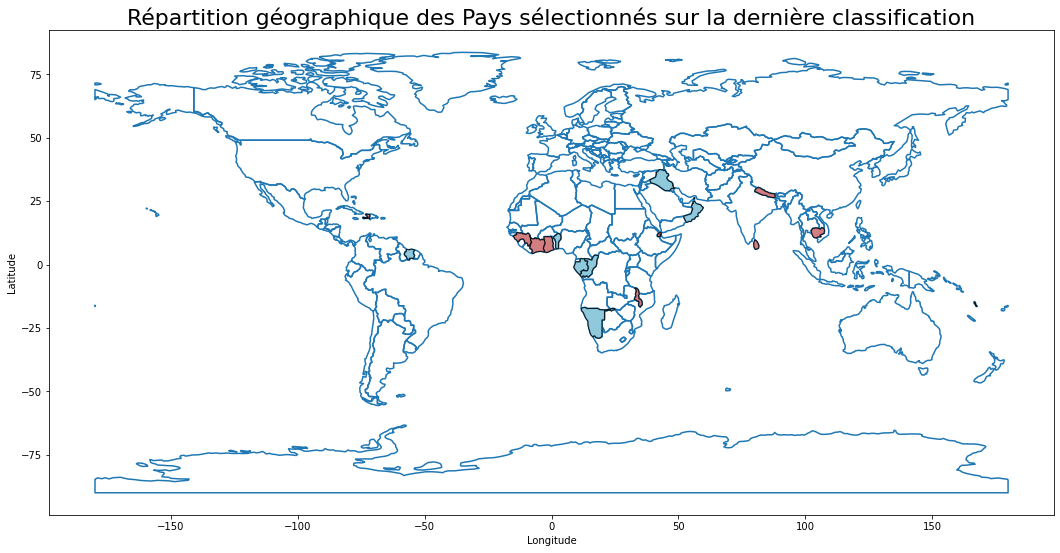

<Figure size 432x288 with 0 Axes>

In [21]:
def plotCountryPatch( axes, country_name, fcolor):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2))

# plot du monde entier
#ax2 = world.plot( figsize=(12,8), edgecolor=u'gray', cmap='Set3' )
ax2 = world.boundary.plot(figsize=(18,15) )

# Plot des pays avec la bonne couleur
for zone_y, color in dict_pays_km.items():
    plotCountryPatch(ax2, zone_y, color)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Répartition géographique des Pays sélectionnés sur la dernière classification', fontsize=22)

ax2.axis('scaled')
plt.show()
plt.savefig('exports/geo_fin_2.png')